


## Théorie d'information et traitement de signal pour la data science

- Nom Complet: 
	- Ibrahim Lahlou
	- Fatima azzahra Ettarfi


Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées


L'algorithme de Box-Muller permet de générer des variables aléatoires normalement distribuées en utilisant les variables $U_1$ et $U_2$ comme suit :

\begin{align*}
R &= \sqrt{-2 \log(U_1)}, \\
\Theta &= 2\pi U_2, \\
Z &= R \cos(\Theta).
\end{align*}

La variable aléatoire $Z$ obtenue ainsi suit une distribution normale standard.


Sachant que $U_1, U_2, \ldots$ une séquence de variables aléatoires indépendantes et identiquement distribuées selon une loi normale standard.


### Question 1 : Génération alétoires de données massives

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)

    R = np.sqrt(-2 * np.log(np.where(U1 > 0, U1, 1e-10)))  # Replace 0 values with a small epsilon (1e-10)

    Theta = 2 * np.pi * U2
    Z = R * np.cos(Theta)

    return Z


In [3]:
def visualize_histograms(X,Y,n, alpha, var):
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    
    # Affichage de l'histogramme
    plt.hist(Y, bins='auto', alpha=alpha, color='blue')
    
    # Affichage du texte indiquant le nombre d'échantillons
    plt.text(0.5, -0.2, f"Histogrammes des données massives générées correspondant à n = {n}",
             horizontalalignment='center', transform=plt.gca().transAxes)
    
    # Ajout des points sous forme de cercles vides
    plt.scatter(X, Y, marker='o', facecolors='none', edgecolors='red')
  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Histogrammes des données massives générées correspondant à n = {n}")
    
    plt.grid(True)
    plt.show()

1.  1 Génération des données

In [5]:
#n = int(input("Éntrer le nombre d’échantillons à tester = "))
#alpha = float(input("Éntrer la valeur de alpha paramètre (comprise entre 0 et 1) = ")) 
#var = float(input("Éntrer la valeur attribuée à la variance (entre 0 et 1) = "))

1. 2 Les histogrammes des data massives générées correspondant aux nombres n = 20, 50, 300, 1000 et 7000

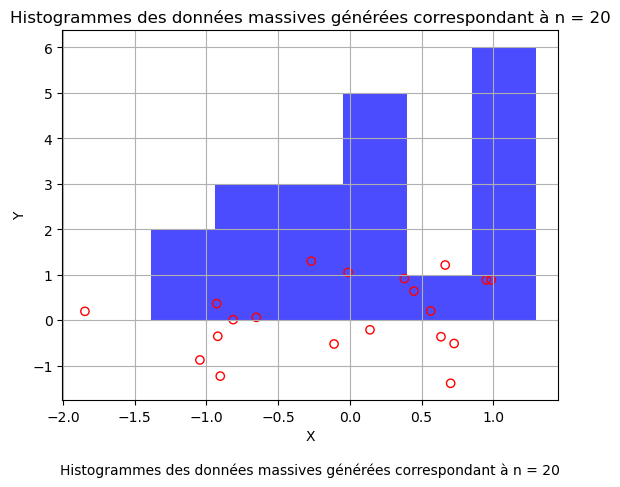

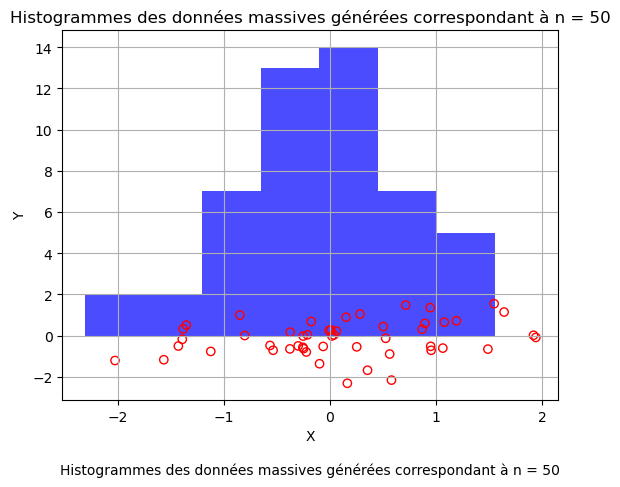

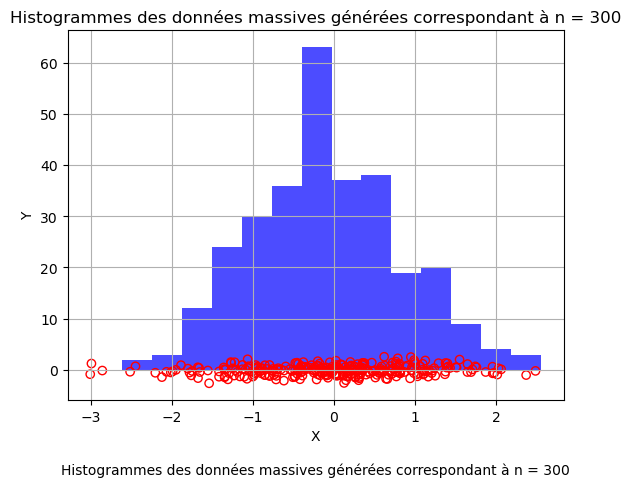

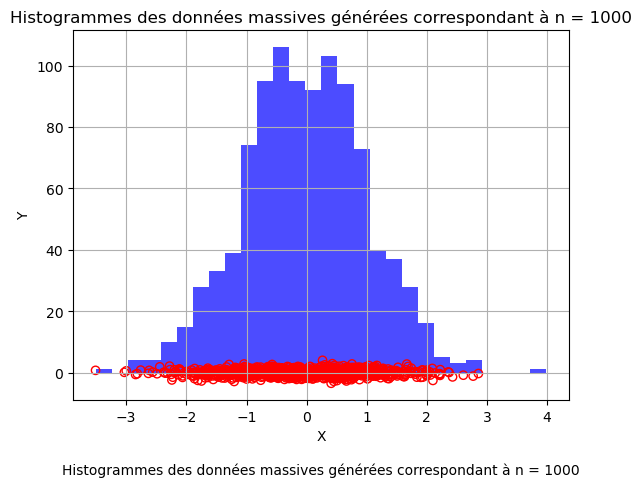

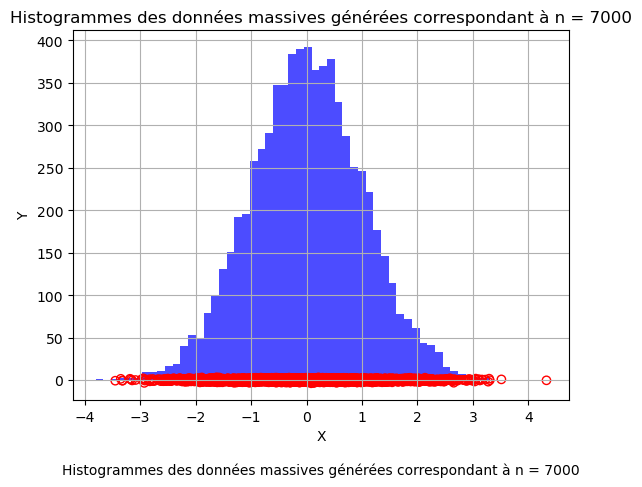

In [7]:
lst = [20,50,300,1000,7000]

alpha =0.7
var = 0.5

for n in lst:
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    visualize_histograms(X,Y,n, alpha, var)

\begin{align*}
X_1, X_2, \ldots, X_n & \text{ i.i.d. avec moyenne } \mu \text{ et variance } \sigma^2.\\
S_n &= X_1 + X_2 + \ldots + X_n.\\
E[S_n] &= n\mu, \quad \text{Var}(S_n) = n\sigma^2.\\
\text{Selon le théorème central limite,} \\
\lim_{{n \to \infty}} \frac{{S_n - n\mu}}{{\sqrt{n\sigma^2}}} &\approx \text{Distribution normale}.
\end{align*}

Cela démontre que lorsque le nombre d'échantillons 

n devient très grand, la somme des échantillons $S_n$
  tend à se rapprocher d'une distribution normale avec une moyenne de $\mu$
nμ et une variance de 2nσ 

### Question 2 :

In [1]:
mu = np.mean(Y) 
print("Mean of Y:", mu) 
sigma = np.std(Y) 
print("Standard deviation of Y:", sigma) 
Point_G = [np.mean(X), np.mean(Y)] 
print("Point G:", Point_G)

NameError: name 'np' is not defined